In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

IMAGE_SIZE = [224, 224]

def VGG16(input_shape=(32,32,1),n_output=2):

    clf = Sequential()
    clf.add(Conv2D(64,(3,3),input_shape = input_shape,padding="same",activation='relu'))
    clf.add(Conv2D(64,(3,3),padding="same",activation='relu'))
    clf.add(MaxPool2D(pool_size=(2,2)))
    clf.add(BatchNormalization())

    clf.add(Conv2D(128,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(128,(3,3),padding="same",activation='relu'))
    clf.add(MaxPool2D(pool_size=(2,2)))
    clf.add(BatchNormalization())

    clf.add(Conv2D(256,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(256,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(256,(3,3),padding="same",activation='relu'))
    clf.add(MaxPool2D(pool_size=(2,2)))
    clf.add(BatchNormalization())

    clf.add(Conv2D(512,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(512,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(512,(3,3),padding="same",activation='relu'))
    clf.add(MaxPool2D(pool_size=(2,2)))
    clf.add(BatchNormalization())

    clf.add(Conv2D(512,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(512,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(512,(3,3),padding="same",activation='relu'))
    clf.add(MaxPool2D(pool_size=(2,2)))
    clf.add(BatchNormalization())

    # Begin - FC Layer
    clf.add(Flatten())
    clf.add(Dense(4096,activation='relu'))
    clf.add(Dropout(0.2))
    clf.add(BatchNormalization())
    clf.add(Dense(4096,activation='relu'))
    clf.add(Dropout(0.2))
    clf.add(BatchNormalization())
    # Output Layer
    clf.add(Dense(n_output,activation='softmax'))

    return clf

# Optimizer selection
opt = Adam(learning_rate=0.001)
model = VGG16(input_shape = IMAGE_SIZE +[3],n_output=5)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-10-29 05:48:43.335965: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-29 05:48:43.336064: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory('flowers_filtered/train',
                                                target_size=(224,224),
                                                batch_size = 32,
                                                class_mode='categorical')

test_set = test_datagen.flow_from_directory('flowers_filtered/test',
                                                target_size=(224,224),
                                                batch_size = 16,
                                                class_mode='categorical')


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

hist = model.fit_generator(train_set,steps_per_epoch=93,
                            epochs=10,
                            validation_data=test_set,
                            validation_steps=82,
                            callbacks=[checkpoint,early])

Found 3000 images belonging to 5 classes.
Found 1317 images belonging to 5 classes.


/Users/akshayjavagalsomashekhar/miniforge3/envs/flowers/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-10-29 05:48:43.917907: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-29 05:48:43.918147: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2021-10-29 05:48:44.284613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


93/93 [==============================] - ETA: 0s - loss: 2.4924 - accuracy: 0.3022

2021-10-29 05:55:31.452688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


93/93 [==============================] - 432s 5s/step - loss: 2.4924 - accuracy: 0.3022 - val_loss: 2.8470 - val_accuracy: 0.3178

Epoch 00001: val_accuracy improved from -inf to 0.31784, saving model to model.h5
Epoch 2/10
93/93 [==============================] - 432s 5s/step - loss: 1.7126 - accuracy: 0.3976 - val_loss: 2.0568 - val_accuracy: 0.3849

Epoch 00002: val_accuracy improved from 0.31784 to 0.38491, saving model to model.h5
Epoch 3/10
93/93 [==============================] - 469s 5s/step - loss: 1.4565 - accuracy: 0.4569 - val_loss: 2.1224 - val_accuracy: 0.4146

Epoch 00003: val_accuracy improved from 0.38491 to 0.41463, saving model to model.h5
Epoch 4/10
93/93 [==============================] - 440s 5s/step - loss: 1.4786 - accuracy: 0.4579 - val_loss: 1.4578 - val_accuracy: 0.2858

Epoch 00004: val_accuracy did not improve from 0.41463
Epoch 5/10
93/93 [==============================] - 463s 5s/step - loss: 1.4194 - accuracy: 0.4926 - val_loss: 2.1518 - val_accuracy: 0.

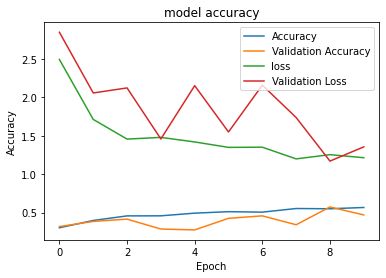

In [3]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

2021-10-29 07:04:13.993001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


rose
[[0. 0. 1. 0. 0.]]


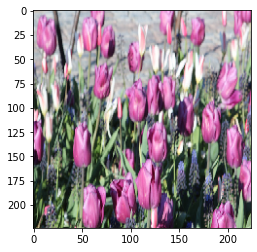

In [4]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

path = '/Users/akshayjavagalsomashekhar/Documents/DLCVNLP/flowers/flowers_filtered/test/tulip/13910028149_6c9d5485ef.jpg'
img = image.load_img(path,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
saved_model = load_model("model.h5")
output = saved_model.predict(img)
if output[0][0] > 0.5:
    print("daisy")
elif output[0][1] > 0.5:
    print('dandelion')
elif output[0][2] > 0.5:
    print('rose')
elif output[0][3] > 0.5:
    print('sunflower')
elif output[0][4] > 0.5:
    print('tulip')
print(output)


In [5]:
def VGG19(input_shape=(32,32,1),n_output=2):

    clf = Sequential()
    clf.add(Conv2D(64,(3,3),input_shape = input_shape,padding="same",activation='relu'))
    clf.add(Conv2D(64,(3,3),padding="same",activation='relu'))
    clf.add(MaxPool2D(pool_size=(2,2)))
    clf.add(BatchNormalization())

    clf.add(Conv2D(128,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(128,(3,3),padding="same",activation='relu'))
    clf.add(MaxPool2D(pool_size=(2,2)))
    clf.add(BatchNormalization())

    clf.add(Conv2D(256,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(256,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(256,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(256,(3,3),padding="same",activation='relu'))
    clf.add(MaxPool2D(pool_size=(2,2)))
    clf.add(BatchNormalization())

    clf.add(Conv2D(512,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(512,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(512,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(512,(3,3),padding="same",activation='relu'))
    clf.add(MaxPool2D(pool_size=(2,2)))
    clf.add(BatchNormalization())

    clf.add(Conv2D(512,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(512,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(512,(3,3),padding="same",activation='relu'))
    clf.add(Conv2D(512,(3,3),padding="same",activation='relu'))
    clf.add(MaxPool2D(pool_size=(2,2)))
    clf.add(BatchNormalization())

    # Begin - FC Layer
    clf.add(Flatten())
    clf.add(Dense(4096,activation='relu'))
    clf.add(Dropout(0.2))
    clf.add(BatchNormalization())
    clf.add(Dense(4096,activation='relu'))
    clf.add(Dropout(0.2))
    clf.add(BatchNormalization())

    # Output Layer
    clf.add(Dense(n_output,activation='softmax'))

    return clf

model_vgg19 = VGG19(input_shape = IMAGE_SIZE +[3],n_output=5)
model_vgg19.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model_vgg19.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)      

In [6]:
hist = model_vgg19.fit_generator(train_set,steps_per_epoch=93,
                            epochs=10,
                            validation_data=test_set,
                            validation_steps=82,
                            callbacks=[checkpoint,early])

/Users/akshayjavagalsomashekhar/miniforge3/envs/flowers/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10


2021-10-29 07:04:16.059694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


93/93 [==============================] - ETA: 0s - loss: 3.1216 - accuracy: 0.2463

2021-10-29 07:12:48.277453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


93/93 [==============================] - 569s 6s/step - loss: 3.1216 - accuracy: 0.2463 - val_loss: 8.6859 - val_accuracy: 0.2111

Epoch 00001: val_accuracy did not improve from 0.57317
Epoch 2/10
93/93 [==============================] - 10138s 110s/step - loss: 2.1045 - accuracy: 0.2925 - val_loss: 6.9484 - val_accuracy: 0.1982

Epoch 00002: val_accuracy did not improve from 0.57317
Epoch 3/10
93/93 [==============================] - 610s 7s/step - loss: 1.9354 - accuracy: 0.3137 - val_loss: 4.2233 - val_accuracy: 0.3171

Epoch 00003: val_accuracy did not improve from 0.57317
Epoch 4/10
93/93 [==============================] - 534s 6s/step - loss: 1.8680 - accuracy: 0.3167 - val_loss: 1.9625 - val_accuracy: 0.2226

Epoch 00004: val_accuracy did not improve from 0.57317
Epoch 5/10
93/93 [==============================] - 473s 5s/step - loss: 1.9105 - accuracy: 0.3177 - val_loss: 1.8561 - val_accuracy: 0.4390

Epoch 00005: val_accuracy did not improve from 0.57317
Epoch 6/10
93/93 [====

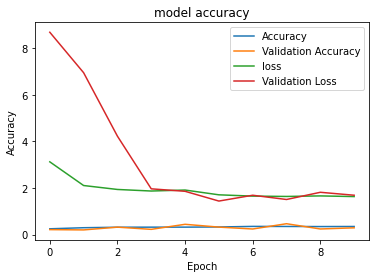

In [7]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [8]:
saved_model = load_model("model.h5")
output = saved_model.predict(img)
if output[0][0] > 0.5:
    print("daisy")
elif output[0][1] > 0.5:
    print('dandelion')
elif output[0][2] > 0.5:
    print('rose')
elif output[0][3] > 0.5:
    print('sunflower')
elif output[0][4] > 0.5:
    print('tulip')
print(output)

2021-10-29 11:12:19.810071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


rose
[[0. 0. 1. 0. 0.]]
